In [1]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy import signal, misc
from scipy.ndimage import gaussian_filter1d

In [12]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Impedance heating_2Kmin individual file\200.49.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#4294A_Cp,4294A_D,4294A_Frequency,4294A_R_raw,4294A_X_raw,E1,E2
0,2.234330e-10,0.103249,100.000,727699.6,-7048029.0,6139.366,633.8814
1,2.222507e-10,0.104137,107.227,688010.0,-6606758.0,6106.882,635.9543
2,2.209368e-10,0.104632,114.976,648457.8,-6197493.0,6070.779,635.1993
3,2.203133e-10,0.105129,123.285,609280.0,-5795565.0,6053.645,636.4116
4,2.193424e-10,0.106372,132.194,577331.0,-5427493.0,6026.969,641.0983
5,2.183621e-10,0.105656,141.747,537283.1,-5085196.0,6000.032,633.9414
6,2.170727e-10,0.106867,151.991,509694.7,-4769416.0,5964.603,637.4211
7,2.158044e-10,0.107052,162.975,478943.6,-4473939.0,5929.753,634.7912
8,2.147896e-10,0.108366,174.753,454157.4,-4190944.0,5901.869,639.5641
9,2.141430e-10,0.107421,187.382,421208.3,-3921080.0,5884.101,632.0791


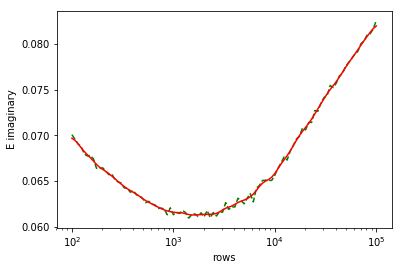

[44]


In [26]:
# 提取 E imaginary 的列
E_ima = df['4294A_D']
# 做smooth，不然 find peak 会很麻烦
E_ima_smooth = gaussian_filter1d(E_ima.iloc[:],1.5) #10代表 smooth的强度，最好是能刚好取出杂峰，又不smooth 太重

plt.plot(df['4294A_Frequency'],E_ima,'g--')
plt.plot(df['4294A_Frequency'],E_ima_smooth,'r')
plt.xscale('log')
plt.xlabel('rows')
plt.ylabel('E imaginary')
# plt.xlim((1000,5000))
plt.show()

# find peak
indices = find_peaks(E_ima_smooth, prominence=0)[0]# promince 是调节峰的突起程度，我的峰不太突起，所以设为0
print(indices)

In [5]:
indices[0]
#常见的错误在于：某一个文件的峰找不到
#解决方案是该smooth的强度

IndexError: index 0 is out of bounds for axis 0 with size 0

# Below is the code，above is for breakdown the loop and debug

In [11]:
#从文件名提取温度with regular expression
path = r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Impedance heating_2Kmin individual file'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[199.85, 199.93, 200.03, 200.14, 200.25, 200.38, 200.49, 200.59, 200.69, 200.79, 200.9, 201.01, 201.1, 201.19, 201.28, 201.36, 201.47, 201.56, 201.65, 201.74, 201.83, 201.93, 202.02, 202.11, 202.19, 202.28, 202.38, 202.47, 202.56, 202.64, 202.73, 202.83, 202.92, 203.0, 203.09, 203.17, 203.28, 203.36, 203.44, 203.53, 203.61, 203.71, 203.8, 203.88, 203.97, 204.05, 204.15, 204.23, 204.32, 204.4, 204.5, 204.58, 204.67, 204.75, 204.83, 204.93, 205.01, 205.1, 205.18, 205.26, 205.36, 205.44, 205.53, 205.61, 205.69, 205.77, 205.87, 205.96, 206.04, 206.12, 206.22, 206.31, 206.4, 206.48, 206.56, 206.66, 206.74, 206.82, 206.91, 207.0, 207.09, 207.17, 207.25, 207.35, 207.43, 207.51, 207.59, 207.69, 207.77, 207.85, 207.93, 208.03, 208.11, 208.19, 208.28, 208.37, 208.46, 208.54, 208.64, 208.73, 208.81, 208.89, 208.99, 209.09, 209.17, 209.25, 209.33, 209.43, 209.51, 209.59, 209.69, 209.77, 209.85, 209.93, 210.03, 210.12, 210.2, 210.28, 210.38, 210.46, 210.54, 210.62, 210.72, 210.8, 210.88, 210.98, 21

In [13]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Impedance heating_2Kmin individual file'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['E imaginary']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_ima )
    i = i+1

  
dt.head(10)


,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,299.16,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,0.168094,0.471859,0.703912,0.543192,0.716216,0.077248,1.390619,0.106547,0.506144,0.313512,...,14.62262,15.06397,15.45590,14.57867,14.15268,14.60415,14.84254,14.50623,14.40305,15.02640
1,1.421352,-0.052269,-0.047391,1.459234,1.417195,1.636740,1.539689,0.670678,1.214215,0.741232,...,14.41523,14.42592,14.51283,14.81508,14.27776,15.16811,14.26610,14.44567,15.82917,14.43808
2,1.004209,2.102662,1.060787,1.136525,1.079980,1.469450,0.366964,1.531584,1.855312,1.793210,...,14.14430,13.93411,14.35980,14.25237,14.70898,15.03208,14.85293,15.00486,15.28541,14.98062
3,0.672721,1.278273,0.546299,0.181769,0.973463,0.035394,1.140308,0.155547,1.002657,0.186078,...,14.27459,14.11370,14.73746,15.14945,14.40560,13.91291,14.22489,14.61664,13.84423,15.03069
4,0.778123,1.343040,0.959992,1.288206,1.738350,1.803233,0.837105,1.394018,1.694644,1.093812,...,14.22096,13.86533,13.34440,14.41598,14.25477,14.51194,14.34404,14.27020,14.44880,14.42610
5,1.007735,1.074661,-0.436436,1.852555,0.257598,0.739896,0.738087,1.037234,0.597577,1.636245,...,13.63114,13.90134,13.53355,13.44449,13.61414,14.21836,13.73986,13.76310,14.51105,14.41148
6,0.499689,1.023232,1.027420,0.882278,0.322548,0.314312,0.880620,0.807035,0.153555,0.872038,...,14.41164,13.84546,14.13592,13.86631,14.55516,13.26847,14.81249,14.18980,13.76677,14.69707
7,0.433858,0.334920,0.468582,1.166869,-0.193469,0.626999,1.090477,0.755135,-0.247272,0.521125,...,13.78786,14.35879,13.87650,14.01593,14.07120,12.93891,13.32422,13.28199,13.49578,14.05696
8,0.533197,0.666707,1.042683,-0.436115,0.654541,0.480294,0.790720,0.718187,0.876689,0.341534,...,13.24794,13.40305,13.78729,13.87353,14.03360,13.60535,13.32124,14.00727,13.37778,14.12930
9,1.423208,1.297754,0.578283,1.197748,1.710972,1.349773,1.175529,0.841833,1.776174,1.265807,...,12.68765,13.22572,12.53294,13.66102,12.97473,14.29434,13.30537,13.95614,13.91132,12.68221


In [17]:
# dt.insert(0,'f',df['#4294A_Frequency'])
dt.shape
dt.head()


,f,297.97,298.11,298.27,298.41,298.54,298.68,298.8,298.93,299.05,...,429.29,429.33,429.44,429.47,429.78,429.85,429.96,429.99,430.08,430.22
0,1000.000,0.168094,0.471859,0.703912,0.543192,0.716216,0.077248,1.390619,0.106547,0.506144,...,14.62262,15.06397,15.45590,14.57867,14.15268,14.60415,14.84254,14.50623,14.40305,15.02640
1,1013.939,1.421352,-0.052269,-0.047391,1.459234,1.417195,1.636740,1.539689,0.670678,1.214215,...,14.41523,14.42592,14.51283,14.81508,14.27776,15.16811,14.26610,14.44567,15.82917,14.43808
2,1028.073,1.004209,2.102662,1.060787,1.136525,1.079980,1.469450,0.366964,1.531584,1.855312,...,14.14430,13.93411,14.35980,14.25237,14.70898,15.03208,14.85293,15.00486,15.28541,14.98062
3,1042.404,0.672721,1.278273,0.546299,0.181769,0.973463,0.035394,1.140308,0.155547,1.002657,...,14.27459,14.11370,14.73746,15.14945,14.40560,13.91291,14.22489,14.61664,13.84423,15.03069
4,1056.935,0.778123,1.343040,0.959992,1.288206,1.738350,1.803233,0.837105,1.394018,1.694644,...,14.22096,13.86533,13.34440,14.41598,14.25477,14.51194,14.34404,14.27020,14.44880,14.42610


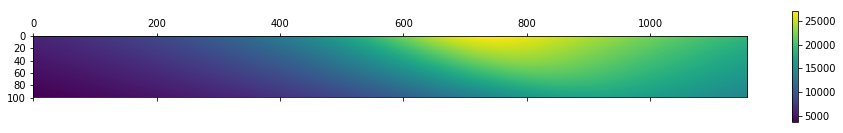

In [15]:
mpl.pyplot.matshow(dt,cmap='viridis')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [17]:
dt.insert(0,'f',df['4294A_Frequency'])
dt.shape
dt.head()


,f,199.85,199.93,200.03,200.14,200.25,200.38,200.49,200.59,200.69,...,299.43,299.51,299.6,299.69,299.76,299.85,299.94,300.02,300.1,300.17
0,100.000,6072.252,6080.732,6063.140,6105.807,6101.850,6123.301,6139.366,6131.684,6137.980,...,19234.23,19231.03,19218.56,19187.66,19159.59,19149.84,19125.71,19117.11,19104.32,19101.85
1,107.227,6049.199,6047.862,6063.280,6065.166,6080.258,6091.508,6106.882,6117.715,6143.237,...,19181.43,19166.76,19158.32,19130.48,19106.78,19100.27,19079.07,19034.86,19033.87,19023.69
2,114.976,6015.034,6019.009,6034.134,6037.057,6050.136,6059.675,6070.779,6084.352,6089.900,...,19129.35,19098.46,19101.70,19073.58,19058.65,19047.46,19020.56,18990.13,18985.05,18975.58
3,123.285,5987.597,5992.939,5990.021,6010.726,6022.544,6043.418,6053.645,6070.205,6066.026,...,19078.52,19066.63,19028.34,19015.43,19009.05,18986.26,18964.42,18934.01,18938.40,18921.30
4,132.194,5952.225,5971.896,5975.962,5982.477,6003.898,6009.711,6026.969,6022.541,6030.116,...,19017.50,19008.97,18974.76,18949.12,18956.38,18924.49,18902.25,18893.15,18874.55,18856.89


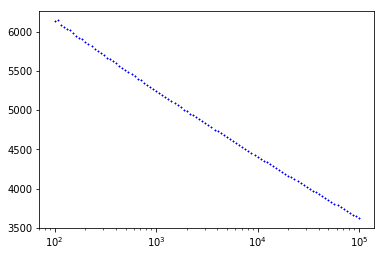

In [19]:
plt.plot(dt['f'],dt['200.69'],'b+',linewidth=1, markersize=2)
plt.xscale("log")
plt.show()

In [20]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\E1_f_T heating.csv')

# E imaginary

In [36]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Impedance heating_2Kmin individual file'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['E2']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_ima_smooth )
    i = i+1

  
dt.head(10)


,199.85,199.93,200.03,200.14,200.25,200.38,200.49,200.59,200.69,200.79,...,299.43,299.51,299.6,299.69,299.76,299.85,299.94,300.02,300.1,300.17
0,625.744145,624.639950,625.101842,627.057849,626.137563,628.233864,631.629989,632.544788,629.041498,632.356184,...,1253.905901,1253.746397,1253.361992,1256.986945,1255.456607,1254.607868,1254.312360,1256.160673,1253.440087,1256.064498
1,625.646338,624.546289,625.008423,626.966091,626.061223,628.145868,631.534526,632.439661,628.978090,632.271453,...,1253.250540,1253.097206,1252.702102,1256.305478,1254.779066,1253.934625,1253.625913,1255.470454,1252.781061,1255.383302
2,625.451199,624.359469,624.822216,626.782967,625.908707,627.970384,631.344115,632.230235,628.850847,632.102394,...,1251.948168,1251.807117,1251.390814,1254.951573,1253.432776,1252.596793,1252.261659,1254.099273,1251.471184,1254.029373
3,625.159563,624.080699,624.544315,626.509270,625.680383,627.708518,631.059626,631.918090,628.658923,631.849584,...,1250.015469,1249.891858,1249.444217,1252.942371,1251.434560,1250.611150,1250.237055,1252.064285,1249.525970,1252.019755
4,624.772742,623.711646,624.176383,626.146111,625.376800,627.361899,630.682390,631.505717,628.401138,631.513935,...,1247.476559,1247.374881,1246.886281,1250.303101,1248.809517,1248.002537,1247.577192,1249.391148,1246.968833,1249.378660
5,624.292552,623.254519,623.720659,625.695019,624.998628,626.932676,630.214161,630.996186,628.076084,631.096775,...,1244.362428,1244.286313,1243.747819,1247.066484,1245.589581,1244.802631,1244.314680,1246.112650,1243.829730,1246.138095
6,623.721218,622.711961,623.179730,625.157937,624.546811,626.423330,629.657198,630.393193,627.682285,630.599668,...,1240.710351,1240.661959,1240.065660,1243.271155,1241.813302,1241.049352,1240.488275,1242.268007,1240.144218,1242.335918
7,623.061400,622.087059,622.556692,624.537163,624.022266,625.836736,629.014037,629.701110,627.218328,630.024446,...,1236.562424,1236.543092,1235.881816,1238.961422,1237.524076,1236.786084,1236.142197,1237.901983,1235.953353,1238.015311
8,622.316248,621.383104,621.854933,623.835409,623.426237,625.176114,628.287603,628.924632,626.683082,629.373296,...,1231.964967,1231.974811,1231.242266,1234.185706,1232.770150,1232.060050,1231.325072,1233.063229,1231.301952,1233.223457
9,621.489347,620.603843,621.078162,623.055803,622.760052,624.444809,627.481227,628.068993,626.075704,628.648549,...,1226.966918,1227.005118,1226.195669,1228.995560,1227.602255,1226.921394,1226.087980,1227.803644,1226.238050,1228.010588


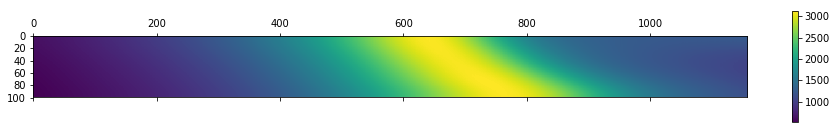

In [37]:
mpl.pyplot.matshow(dt,cmap='viridis')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [38]:
dt.insert(0,'f',df['4294A_Frequency'])
dt.shape
dt.head()

,f,199.85,199.93,200.03,200.14,200.25,200.38,200.49,200.59,200.69,...,299.43,299.51,299.6,299.69,299.76,299.85,299.94,300.02,300.1,300.17
0,100.000,625.744145,624.639950,625.101842,627.057849,626.137563,628.233864,631.629989,632.544788,629.041498,...,1253.905901,1253.746397,1253.361992,1256.986945,1255.456607,1254.607868,1254.312360,1256.160673,1253.440087,1256.064498
1,107.227,625.646338,624.546289,625.008423,626.966091,626.061223,628.145868,631.534526,632.439661,628.978090,...,1253.250540,1253.097206,1252.702102,1256.305478,1254.779066,1253.934625,1253.625913,1255.470454,1252.781061,1255.383302
2,114.976,625.451199,624.359469,624.822216,626.782967,625.908707,627.970384,631.344115,632.230235,628.850847,...,1251.948168,1251.807117,1251.390814,1254.951573,1253.432776,1252.596793,1252.261659,1254.099273,1251.471184,1254.029373
3,123.285,625.159563,624.080699,624.544315,626.509270,625.680383,627.708518,631.059626,631.918090,628.658923,...,1250.015469,1249.891858,1249.444217,1252.942371,1251.434560,1250.611150,1250.237055,1252.064285,1249.525970,1252.019755
4,132.194,624.772742,623.711646,624.176383,626.146111,625.376800,627.361899,630.682390,631.505717,628.401138,...,1247.476559,1247.374881,1246.886281,1250.303101,1248.809517,1248.002537,1247.577192,1249.391148,1246.968833,1249.378660


In [39]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\E2_f_T heating.csv')

In [40]:
#批量操作所有文件
path = r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Impedance heating_2Kmin individual file'

files = glob(path + "/*.tab")


dt=pd.DataFrame()

# lst_T=list()
# lst_E2=list()
i = 0


for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    E_ima = df['4294A_D']
    E_ima_smooth = gaussian_filter1d(E_ima.iloc[:], 10.2)
    dt.insert(i, str(temperature[i]),E_ima )
    i = i+1

  
dt.head(10)


,199.85,199.93,200.03,200.14,200.25,200.38,200.49,200.59,200.69,200.79,...,299.43,299.51,299.6,299.69,299.76,299.85,299.94,300.02,300.1,300.17
0,0.103019,0.103756,0.104602,0.103412,0.105231,0.102302,0.103249,0.104080,0.099570,0.104961,...,0.070450,0.068868,0.069282,0.069060,0.069774,0.069842,0.070491,0.070791,0.069588,0.070088
1,0.104838,0.103906,0.102706,0.104095,0.102539,0.104608,0.104137,0.103573,0.102536,0.102335,...,0.068035,0.068622,0.068765,0.069060,0.069002,0.069770,0.069605,0.069547,0.069047,0.069584
2,0.103903,0.103680,0.104596,0.105979,0.103619,0.105057,0.104632,0.106093,0.103736,0.102609,...,0.068227,0.068270,0.068542,0.068221,0.068315,0.068202,0.068684,0.068711,0.068386,0.069071
3,0.106981,0.105221,0.105683,0.102536,0.103992,0.105437,0.105129,0.105532,0.105566,0.105979,...,0.067730,0.068092,0.067997,0.068998,0.068252,0.068930,0.067924,0.068513,0.067932,0.068788
4,0.103965,0.106553,0.106763,0.107085,0.105633,0.104905,0.106372,0.105140,0.103733,0.105698,...,0.067451,0.068035,0.067566,0.068535,0.067974,0.067895,0.068333,0.067846,0.068353,0.067978
5,0.106640,0.106909,0.105774,0.105272,0.105077,0.105620,0.105656,0.107546,0.105557,0.106314,...,0.067079,0.066940,0.067207,0.068170,0.068301,0.067551,0.067303,0.067720,0.068273,0.067757
6,0.105856,0.106686,0.106153,0.106451,0.104514,0.105998,0.106867,0.106557,0.106810,0.106328,...,0.067033,0.066817,0.067182,0.067591,0.067526,0.066359,0.066918,0.067685,0.067552,0.067814
7,0.109556,0.106075,0.107120,0.107834,0.107109,0.106479,0.107052,0.105202,0.105855,0.106033,...,0.066497,0.066943,0.066323,0.066749,0.066732,0.066557,0.066758,0.066895,0.066897,0.067440
8,0.107646,0.106499,0.106089,0.105737,0.107718,0.107227,0.108366,0.107965,0.108504,0.106873,...,0.066096,0.066513,0.066388,0.066554,0.066656,0.066195,0.066705,0.066998,0.067023,0.066402
9,0.108069,0.108164,0.105244,0.107251,0.106974,0.107615,0.107421,0.107630,0.107344,0.106746,...,0.065577,0.065776,0.066104,0.066464,0.066339,0.066375,0.066375,0.066512,0.066985,0.066379


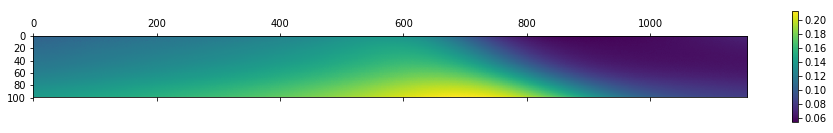

In [41]:
mpl.pyplot.matshow(dt,cmap='viridis')
# plt.axis([58,70,0,10])
plt.colorbar()
# ax.set_xscale('log')
plt.show()

In [42]:
dt.insert(0,'f',df['4294A_Frequency'])
dt.shape
dt.head()

,f,199.85,199.93,200.03,200.14,200.25,200.38,200.49,200.59,200.69,...,299.43,299.51,299.6,299.69,299.76,299.85,299.94,300.02,300.1,300.17
0,100.000,0.103019,0.103756,0.104602,0.103412,0.105231,0.102302,0.103249,0.104080,0.099570,...,0.070450,0.068868,0.069282,0.069060,0.069774,0.069842,0.070491,0.070791,0.069588,0.070088
1,107.227,0.104838,0.103906,0.102706,0.104095,0.102539,0.104608,0.104137,0.103573,0.102536,...,0.068035,0.068622,0.068765,0.069060,0.069002,0.069770,0.069605,0.069547,0.069047,0.069584
2,114.976,0.103903,0.103680,0.104596,0.105979,0.103619,0.105057,0.104632,0.106093,0.103736,...,0.068227,0.068270,0.068542,0.068221,0.068315,0.068202,0.068684,0.068711,0.068386,0.069071
3,123.285,0.106981,0.105221,0.105683,0.102536,0.103992,0.105437,0.105129,0.105532,0.105566,...,0.067730,0.068092,0.067997,0.068998,0.068252,0.068930,0.067924,0.068513,0.067932,0.068788
4,132.194,0.103965,0.106553,0.106763,0.107085,0.105633,0.104905,0.106372,0.105140,0.103733,...,0.067451,0.068035,0.067566,0.068535,0.067974,0.067895,0.068333,0.067846,0.068353,0.067978


In [43]:
dt.to_csv(r'C:\PhD-Zipeng\Research projects\PMN single crystal\Dielectric\Loss tan_f_T heating.csv')